# Import Dependancies

In [39]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [40]:
train_df = pd.read_csv('crypto_data.csv', index_col= 0)

In [41]:
train_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


# Preprocess Data

In [42]:
# Discard all cryptocurrencies that are not being traded. In other words, filter for 
#currencies that are currently being traded 
train_df = train_df.loc[(train_df["IsTrading"] == True)]
train_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [43]:
#drop the IsTrading column from the dataframe.
train_df = train_df.drop(["IsTrading"], axis='columns')
train_df.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000


In [44]:
train_df.shape

(1144, 5)

In [45]:
# Find null values
for column in train_df.columns:
    print(f"Column {column} has {train_df[column].isnull().sum()} null values")

Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [46]:
# Remove all rows that have at least one null value.
train_df = train_df.dropna(axis=0, how="any")
train_df.shape

(685, 5)

In [47]:
train_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [48]:
# Filter for cryptocurrencies that have been mined. Mined should be greater than zero.
train_df = train_df.loc[train_df["TotalCoinsMined"] > 0]
train_df.shape

(532, 5)

In [49]:
# Delete the CoinName from the original dataframe.
train_df = train_df.drop(["CoinName"], axis='columns')
train_df.shape
train_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000
ZEC,Equihash,PoW,7.383056e+06,21000000


In [50]:
train_df['Algorithm'].unique()

array(['Scrypt', 'X13', 'SHA-256', 'Ethash', 'X11', 'CryptoNight-V7',
       'Equihash', 'SHA-512', 'Multiple', 'X15', 'Quark', 'Groestl',
       'PoS', 'NeoScrypt', 'SHA3', 'HybridScryptHash256', 'PHI1612',
       'Lyra2REv2', 'CryptoNight', 'Shabal256', 'Counterparty',
       'Stanford Folding', 'QuBit', 'M7 POW', 'Lyra2RE', 'QUAIT',
       'Blake2b', 'BLAKE256', '1GB AES Pattern Search', 'NIST5', 'Dagger',
       'X11GOST', 'POS 3.0', 'SHA-256D', 'Lyra2Z', 'X14', 'DPoS',
       'Dagger-Hashimoto', 'Blake2S', '536', 'Argon2d', 'Cloverhash',
       'Skein', 'Time Travel', 'Keccak', 'SkunkHash v2 Raptor',
       'VeChainThor Authority', 'Ouroboros', 'POS 2.0', 'C11',
       'SkunkHash', 'Proof-of-BibleHash', 'SHA-256 + Hive',
       'Proof-of-Authority', 'XEVAN', 'VBFT', 'IMesh', 'Green Protocol',
       'Semux BFT consensus', 'X16R', 'Tribus', 'CryptoNight Heavy',
       'Jump Consistent Hash', 'HMQ1725', 'Cryptonight-GPU', 'ECC 256K1',
       'Blake', 'Exosis', 'Equihash+Scrypt', 'Le

In [51]:
train_df['ProofType'].unique()

array(['PoW/PoS', 'PoW', 'PoS', 'PoC', 'PoS/PoW/PoT', 'PoST', 'PoW/nPoS',
       'PoS/PoW', 'dPoW/PoW', 'PoW/PoW', 'DPoS', 'TPoS', 'PoW/PoS ',
       'Proof of Authority', 'PoW and PoS', 'POBh', 'PoW + Hive', 'PoA',
       'HPoW', 'Zero-Knowledge Proof', 'DPOS', 'Pos', 'Proof of Trust',
       'LPoS', 'PoS/LPoS'], dtype=object)

In [52]:
train_df['TotalCoinsMined'].unique()

array([4.19999538e+01, 1.05518490e+09, 2.92794246e+10, 1.79271750e+07,
       1.07684223e+08, 6.30392433e+07, 9.03129438e+06, 1.72011431e+07,
       1.13359703e+08, 7.38305625e+06, 2.74157000e+09, 1.14062191e+10,
       1.28886200e+06, 1.19953349e+07, 5.76831000e+06, 2.55425356e+07,
       1.11497340e+07, 1.22057954e+07, 1.81351000e+07, 6.35423900e+08,
       1.68825425e+09, 8.80000000e+01, 1.70204390e+08, 1.28940951e+08,
       7.35779479e+06, 1.23062801e+08, 2.59557165e+08, 4.95485851e+07,
       3.34429883e+07, 4.25794769e+04, 7.21995665e+06, 1.03911665e+06,
       4.70387952e+06, 4.99698621e+06, 3.99999973e+10, 3.30448775e+06,
       1.59295307e+10, 1.87738575e+10, 1.25390152e+10, 2.09104788e+07,
       2.18871896e+08, 1.94967863e+07, 5.67970500e+06, 4.61829905e+08,
       1.14273215e+06, 2.08669093e+08, 8.84125802e+08, 6.56727205e+07,
       4.16586480e+07, 8.92669337e+07, 1.67852009e+09, 9.05957530e+10,
       1.76509140e+07, 2.10893490e+07, 1.51447650e+08, 1.93263191e+07,
      

In [53]:
train_df['TotalCoinSupply'].unique()

array(['42', '532000000', '314159265359', '21000000', '0', '84000000',
       '22000000', '210000000', '3600570502', '21000000000', '12500000',
       '350000000', '20000000', '64000000', '16768584', '2000000000',
       '384000000000', '169795588', '250000000', '100000000', '247000000',
       '48166000', '500000', '21000000 ', '1000000', '13140000',
       '18000000', '40000000000', '4380000', '16555000000', '13500000000',
       '299792458', '32000000', '11235813', '336000000', '1420609614',
       '70000000', '72245700', '120000000', '90600000000', '265420800',
       '1350000', '42000000', '200000000', '10000000', '2419200000',
       '16180000', '15000000000', '337000000', '3770000', '420000000',
       '98000000', '51200000', '1000', '888000000', '47011968',
       '2300000000', '80000000', '250000', '1600000000', '23000000',
       '5500000', '45000000', '1000000000', '184467440735', '10000000000',
       '2158812800', '500000000', '105120000', '68000000', '1680000000',
       

In [54]:
train_df.shape

(532, 4)

In [55]:
train_df.head

<bound method NDFrame.head of         Algorithm ProofType  TotalCoinsMined TotalCoinSupply
42         Scrypt   PoW/PoS     4.199995e+01              42
404        Scrypt   PoW/PoS     1.055185e+09       532000000
1337          X13   PoW/PoS     2.927942e+10    314159265359
BTC       SHA-256       PoW     1.792718e+07        21000000
ETH        Ethash       PoW     1.076842e+08               0
...           ...       ...              ...             ...
ZEPH      SHA-256      DPoS     2.000000e+09      2000000000
GAP        Scrypt   PoW/PoS     1.493105e+07       250000000
BDX   CryptoNight       PoW     9.802226e+08      1400222610
ZEN      Equihash       PoW     7.296538e+06        21000000
XBC        Scrypt       PoS     1.283270e+05         1000000

[532 rows x 4 columns]>

In [56]:
# convert the remaining features with text values, Algorithm and ProofType, into numerical data. 
#To accomplish this task, use Pandas to create dummy variables. 
X = pd.get_dummies(data=train_df, columns=['Algorithm', 'ProofType'])
print(X.shape)
X.head()

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#Standardize your dataset 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0]

array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

In [58]:
X_scaled.shape

(532, 98)

In [59]:
#Perform dimensionality reduction with PCA. preserve 90% of the explained variance in dimensionality reduction
# How did the number of the features change?
# Initialize PCA model
pca = PCA(n_components=.90)

# Get principal components for the data.
crypto_pca = pca.fit_transform(X_scaled)

# Fetch the explained variance
pca.explained_variance_.sum()

88.47283457566155

In [60]:
crypto_pca.shape

(532, 74)

In [61]:
# reduce the dataset dimensions with t-SNE and visually inspect the results
# run t-SNE on the principal components: the output of the PCA transformation
tsne = TSNE(perplexity=50)
tsne_features = tsne.fit_transform(crypto_pca)
tsne_features.shape

(532, 2)

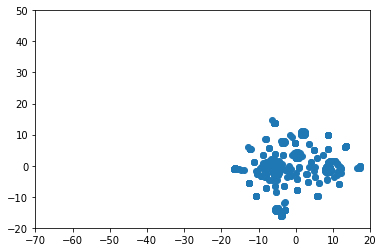

In [65]:
# create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.
x= tsne_features[:,0]
y= tsne_features[:,1]
plt.scatter(x,y)
plt.xlim([-70, 20])
plt.ylim([-20, 50])
plt.show()

In [66]:
# Create an elbow plot to identify the best number of clusters. 
# Use a for-loop to determine the inertia for each k between 1 through 10.
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

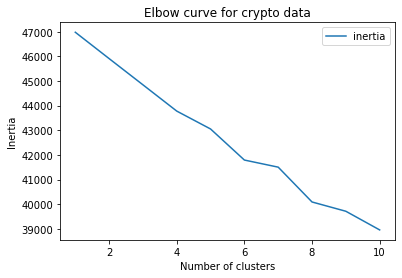

In [67]:
# Create the Elbow Curve
elbow_df = pd.DataFrame({"k": k, "inertia": inertia})
elbow_df.plot.line(x="k", y="inertia")
#if possible, where the elbow of the plot is, and at which value of k it appears.
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for crypto data')
plt.show()

### Can the cryptocurrencies be clustered together?  If so, into how many clusters?
Both tsne and elbow plot using kmeans suggest that there are not meaningful clusters found in the dataset. 